## ***Ejemplo paso a paso de implementación de PCA (Análisis de Componentes Principales)***

# ***1.    Desarrollo de PCA paso a paso***
# ***2.    Desarrollo de PCA vía Scikit-learn***

Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 12


# **1) PCA paso a paso**

En resumen el enfoque de PCA, se puede dividir así:



1.   Estandarizar el conjunto de datos de d dimensiones.
2.   Construir la matriz de covarianza.
3.   Descomponer la matriz de covarianza en sus autovectores y autovalores.
4.   Ordenar los autovalores por orden decreciente para clasificar los correspondientes autovectores.
5.   Seleccionar k autovectores que correspondan a los k autovalores mayores, donde k es la dimensionalidad del nuevo subespacio de características (k<=d)
6.   Construir una matriz de proyección **W** a partir de los **k **autovectores.
7.   Transformar el conjunto de datos de entrada **X** de **d** dimensiones para obtener el nuevo subespacio de características de **k** dimensiones.



# **Se realiza un cargue y análisis rápido de la base de datos mediante un EDA muy básico:**


In [51]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

Dado que se ha colocado sin cabecera, se procede a renombrar cada columna, según el dataset:

In [52]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Se procede a ver la dimensión del dataset:

In [53]:
df_wine.shape

(178, 14)

In [54]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Se observa la distribución de las muestras por clase:

In [55]:
df_wine["Class label"].value_counts().to_frame()

,count
Class label,
2,71
1,59
3,48


Se procede a realizar un gráfico tipo "pair-plot" para analizar visualmente la distribución de datos de cada característica para cada clase:

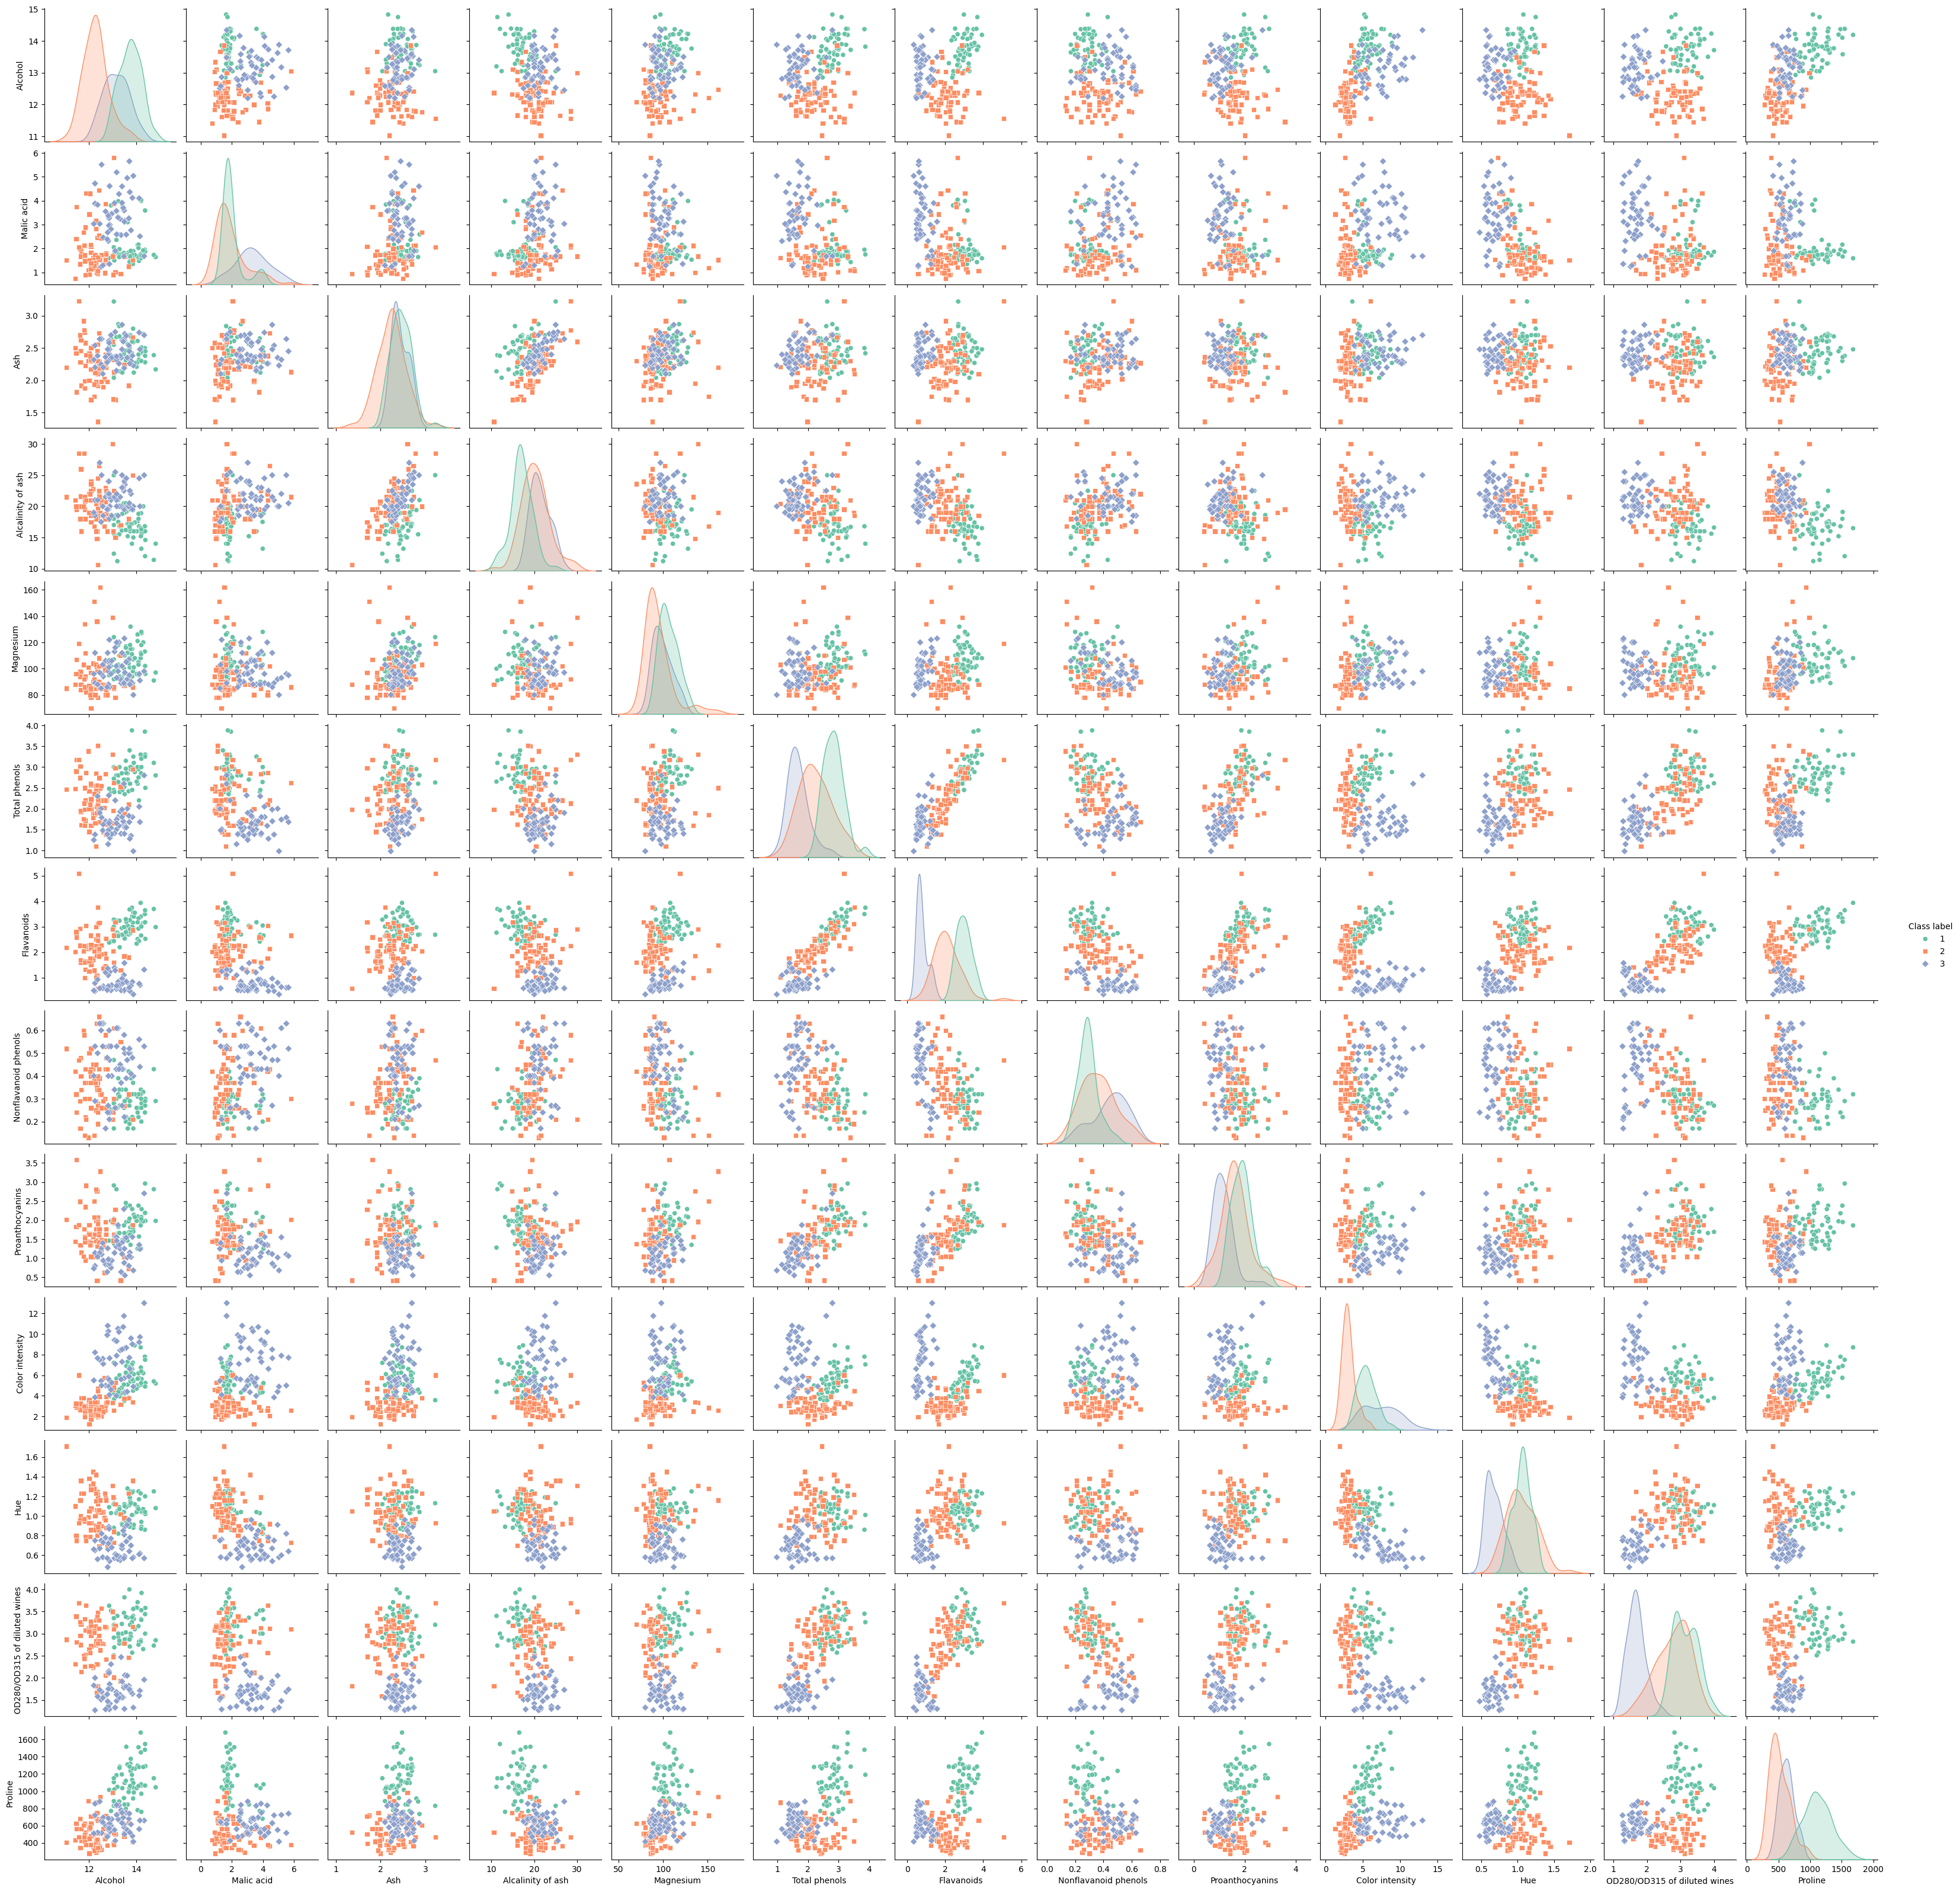

In [56]:
import seaborn as sns
sns.pairplot(df_wine, hue="Class label", markers=["o", "s", "D"], palette="Set2")

Se procede a realizar un análisis mediante histogramas para cada característica y para cada clase:

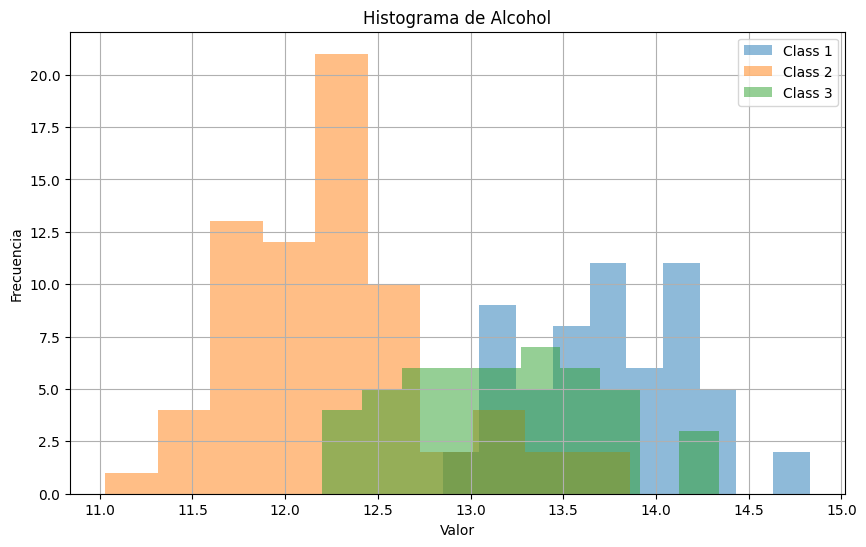

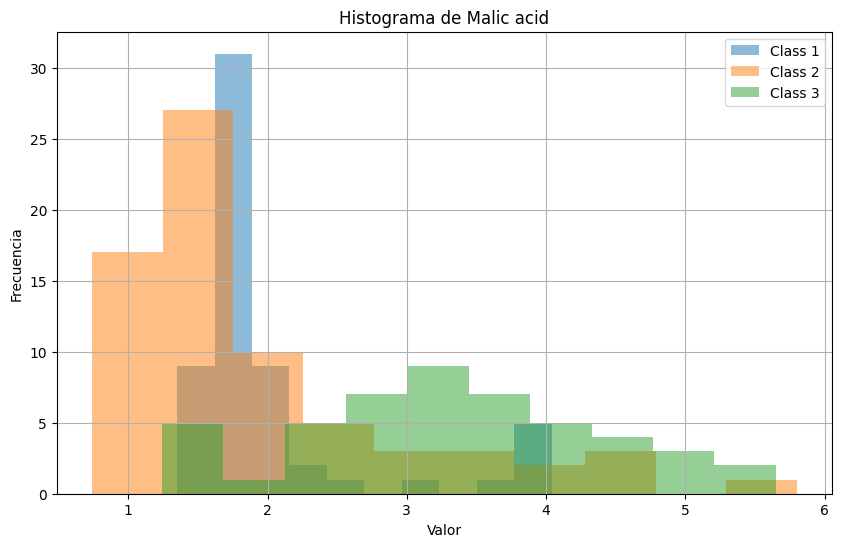

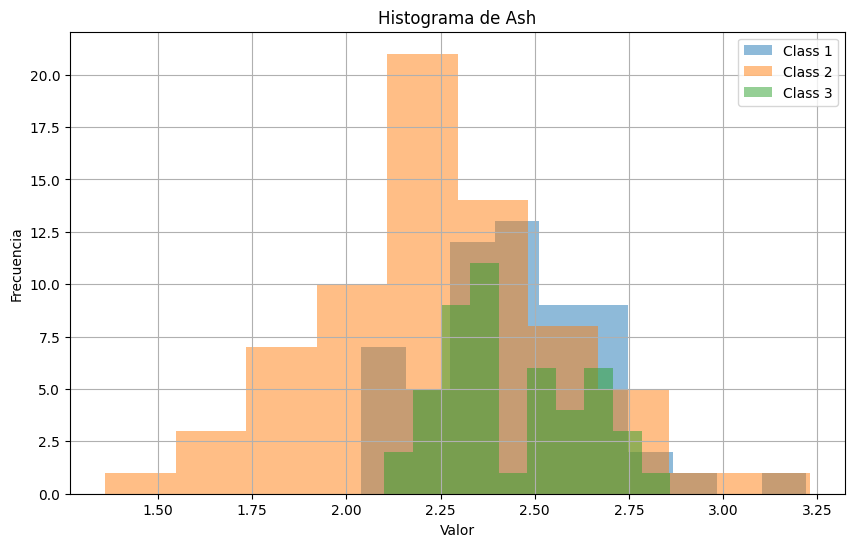

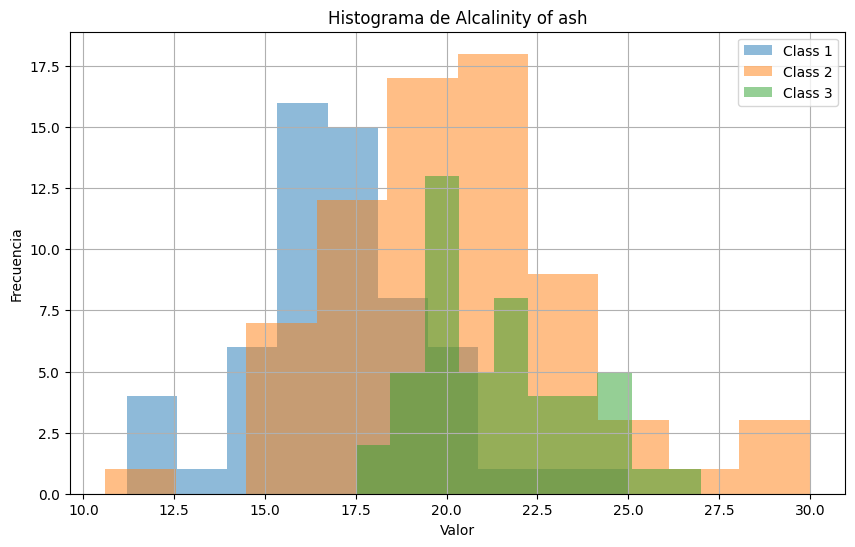

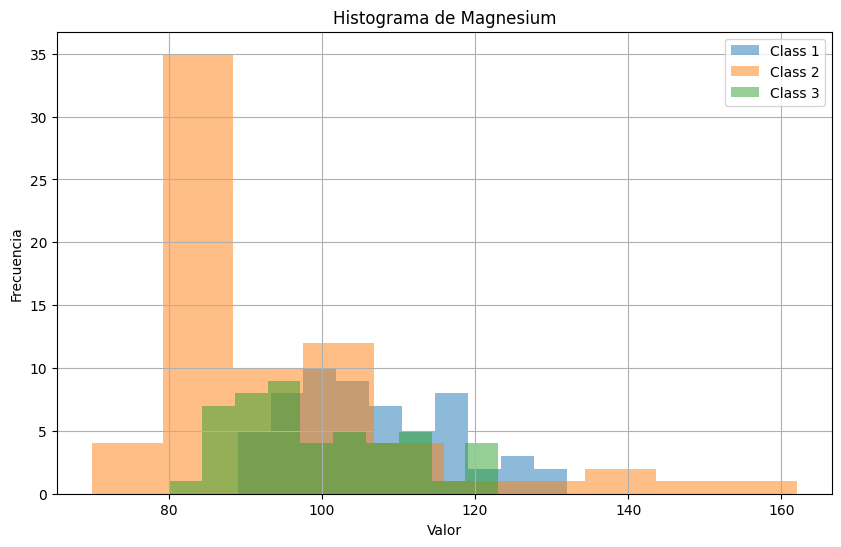

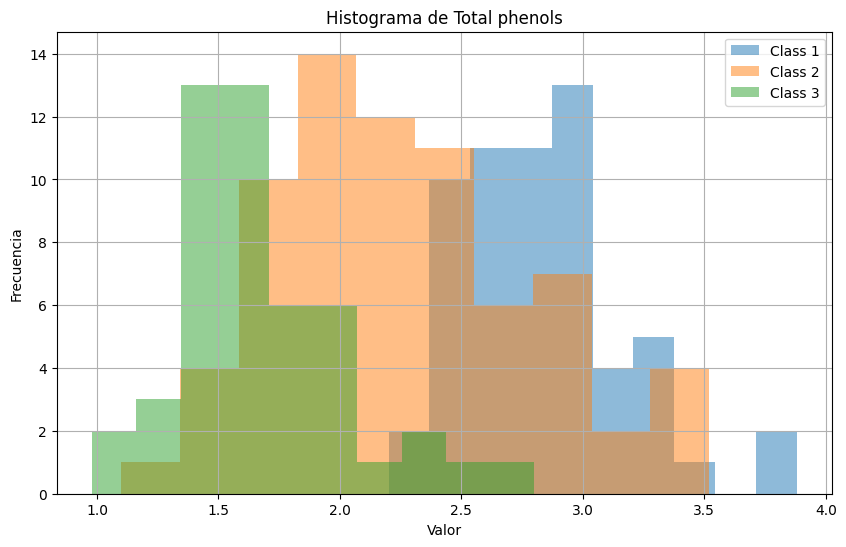

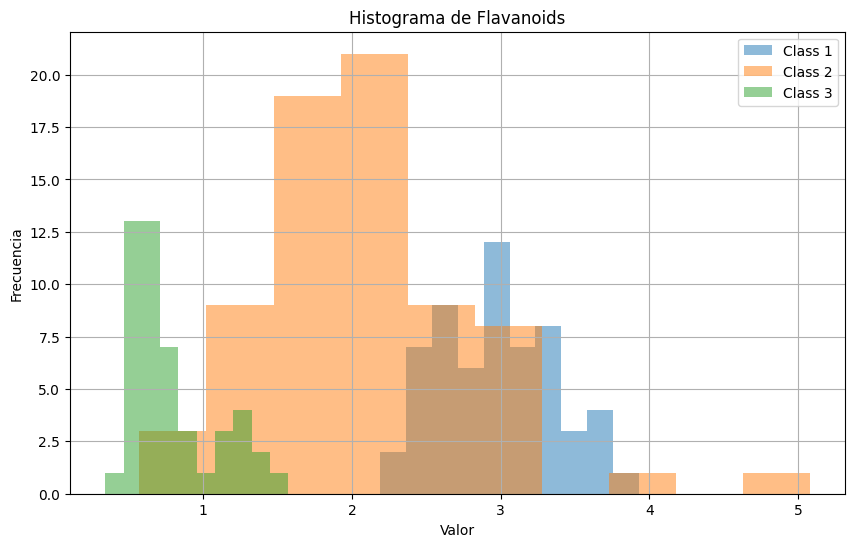

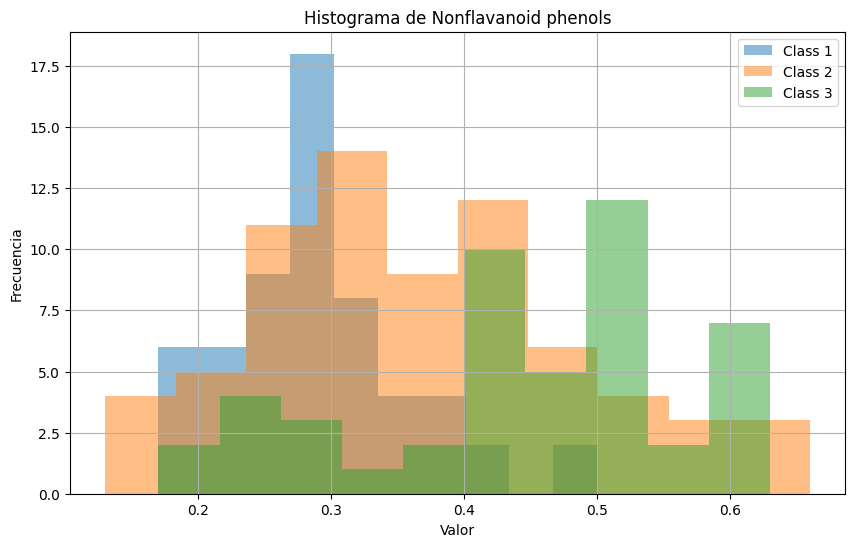

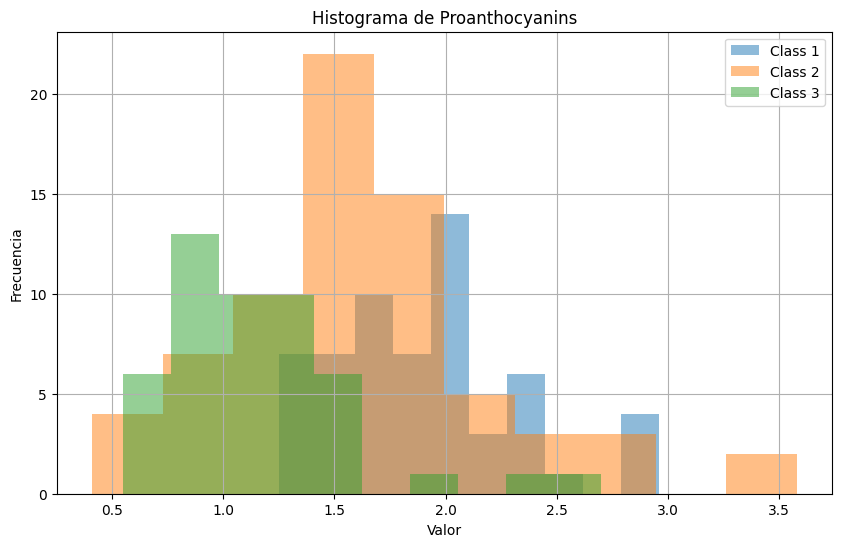

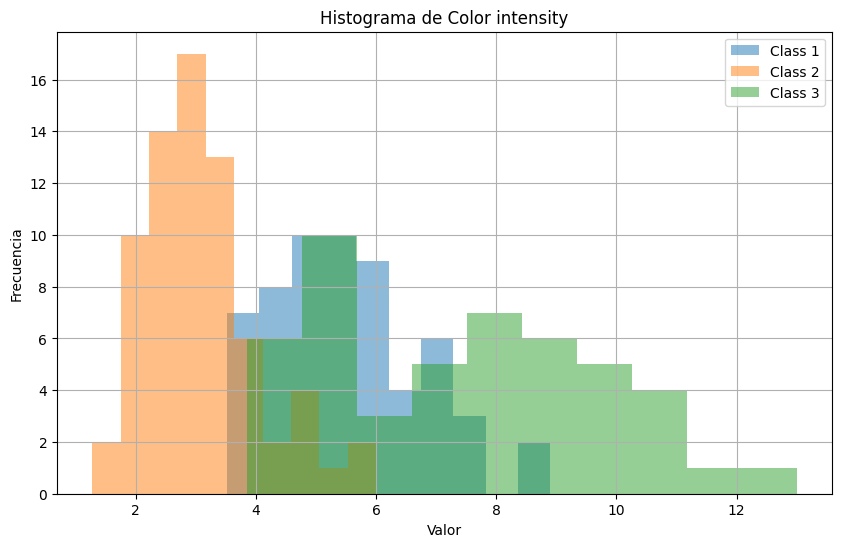

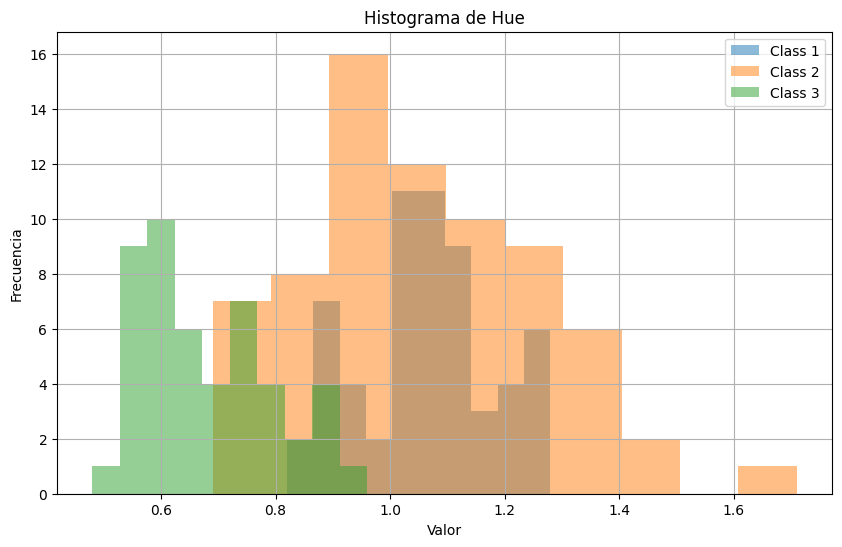

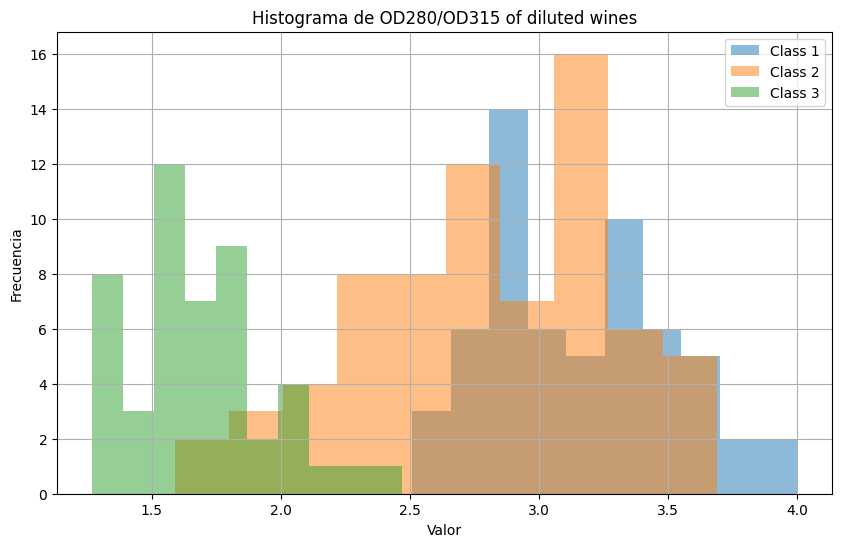

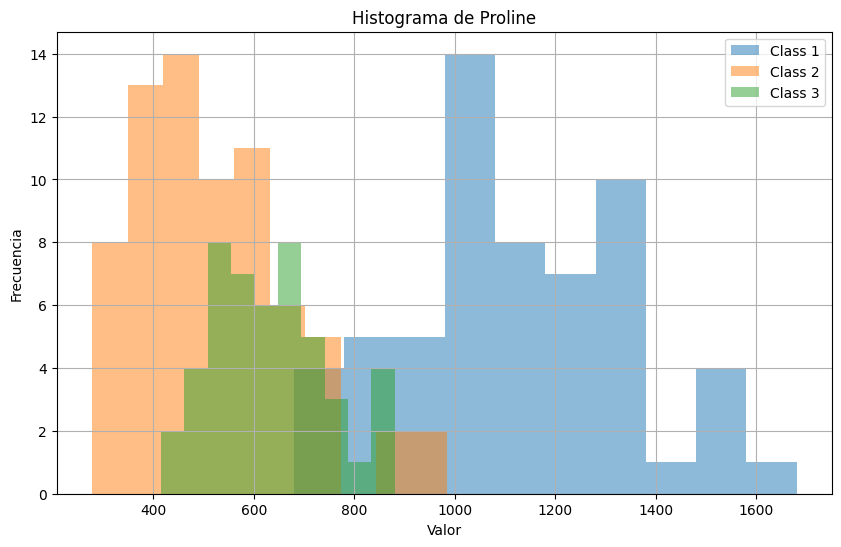

In [57]:
import matplotlib.pyplot as plt

# Obtener las clases únicas
classes = df_wine['Class label'].unique()

# Iterar sobre las características
for feature in df_wine.columns[1:]:
    plt.figure(figsize=(10, 6))
    for cls in classes:
        plt.hist(df_wine[df_wine['Class label'] == cls][feature],
                 bins=10, alpha=0.5, label='Class {}'.format(cls))
    plt.title('Histograma de {}'.format(feature))
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()

# **Realizando los (4) primeros pasos:**



1.   Estandarizar los datos.
2.   Construir la matriz de covarianza.
3.   Obtener los autovalores y los autovectores de la matriz de covarianza.
4.   Ordenar los autovalores por orden decreciente para clasificar los autovectores.


Se procede a dividir los datos en entrenamiento (70%) y testeo (30%):

In [58]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

**1. Estandarizar los datos:**

Se procede a estandarizar los datos de entrenamiento:

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

**2. Construir la matriz de covarianza:**

Calcular el promedio de cada columna:

In [60]:
import numpy as np

# Calcular el promedio de cada columna
promedio_columnas = np.mean(X_train_std, axis=0)
print(promedio_columnas)

[ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15  1.88827448e-15 -1.61519543e-15 -5.78390382e-16  8.63108868e-16 -1.33405831e-16]


Crear una matriz con el promedio de cada columna (Simétrica):

In [61]:
m_prom = np.full_like(X_train_std, promedio_columnas, dtype=float)
print(m_prom)

[[ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15  1.88827448e-15 -1.61519543e-15 -5.78390382e-16  8.63108868e-16 -1.33405831e-16]
 [ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15  1.88827448e-15 -1.61519543e-15 -5.78390382e-16  8.63108868e-16 -1.33405831e-16]
 [ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15  1.88827448e-15 -1.61519543e-15 -5.78390382e-16  8.63108868e-16 -1.33405831e-16]
 [ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15  1.88827448e-15 -1.61519543e-15 -5.78390382e-16  8.63108868e-16 -1.33405831e-16]
 [ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15  1.88827448e-15 -1.6151954

Restar el dataFrame con la matriz de promedios:

In [62]:
n_m = X_train_std - m_prom

print(n_m)

[[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144 -0.62946362]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876  1.01675879  0.66299475  1.0887425  -0.49293533  0.13152077  1.33982592  0.54931269  1.47568796]
 [ 0.84585645 -0.73022996  1.17533605  0.81104754  0.13597904  1.09807851  1.16326665 -0.64419483  1.25249578  0.25863359  1.06806189  0.1308109   1.62934866]
 [ 0.57866141 -0.4736459   0.98882252 -0.24093881  0.77628541  0.04092218  0.45700044 -0.64419483 -0.1709626  -0.37693052  0.66041583  0.36170844  1.045438  ]
 [-0.52655446  0.09083903 -0.68979922 -0.39122257 -0.36203702 -1.1463457  -1.37732987  2.16151323 -1.18771859  0.85182676 -1.01546239 -1.49990297 -0.18384759]
 [-1.15810638 -0.82431078  0.42928194  0.81104754 -1.07348855  0.38246499  0.22157837  0.51109672 -1.01825926 -0.92775274 -0.10958227  0.82350352 -1.13654393]
 [-0.98807317 -0.9098388  -1.65966956 -0.24093

Encontrar la transpuesta de la matriz anterior:

In [63]:
n_m_Trans = n_m.T

print(n_m_Trans)

[[ 0.71225893  0.88229214  0.84585645  0.57866141 -0.52655446 -1.15810638 -0.98807317 -0.63586152 -0.41724739 -1.47388234  0.55437095  1.02803489 -0.32008556 -0.32008556  0.01998086  0.23859499 -1.25526821  0.7851303   0.82156599  0.55437095 -1.91111059  1.31952039 -1.72893215 -0.74516858 -1.92325582  0.09285224  0.05641655  1.24664902  1.00374443  0.01998086  0.63938755  1.53813452 -0.95163748  0.01998086 -1.41315619  0.43291866  0.15357838 -1.44959188 -0.27150464 -0.25935941  2.18183167 -0.0893262   1.36810131  0.16572361  1.63529635 -0.80589473  0.15357838  1.33166562 -1.69249646  0.59080664 -1.0002184   0.01998086 -0.44153785  0.32361159 -0.90305656 -1.68035123  0.97945397 -0.55084491 -0.47797354  0.82156599  0.31146636  0.77298507  1.58671543  0.66367801 -1.51031803  1.10090626 -1.15810638 -0.90305656 -0.3808117   1.44097268  0.72440416  0.25074022  1.41668223  0.96730874 -0.23506895  0.25074022 -0.05289051  0.44506388 -0.85447565 -1.17025161 -0.21077849  2.08466983 -0.63586152  1

Hacer el producto punto entre la transpuesta y la no transpuesta:

In [64]:
Res_multi = n_m_Trans @ n_m #Producto punto

print(Res_multi)

[[124.           8.25275337  21.40858114 -43.59005529  32.44088479  35.76776224  26.8580432   -9.97772783  12.83714694  66.76790118   7.24904959  -2.21034527  78.90809139]
 [  8.25275337 124.          10.24154959  32.41883415 -13.95948129 -41.49473308 -50.47339586  41.39431625 -26.57128655  21.53010913 -67.84593901 -49.89088458 -29.63068898]
 [ 21.40858114  10.24154959 124.          57.09703622  35.78418577  22.16507286  19.11116836  19.58015268  -0.8656448   25.27544952   0.8184696    2.50799316  27.4898856 ]
 [-43.59005529  32.41883415  57.09703622 124.          -9.10993041 -34.51462636 -38.61203633  38.84506455 -30.28390234 -10.91340243 -27.79257251 -20.66388416 -57.06389683]
 [ 32.44088479 -13.95948129  35.78418577  -9.10993041 124.          31.57112033  25.86170074 -31.98421447  24.11003777  25.34594093  16.43251463   8.15890698  51.42752838]
 [ 35.76776224 -41.49473308  22.16507286 -34.51462636  31.57112033 124.         107.16210315 -55.32514455  76.67094128  -6.99852096  62.3168

Dividir por la cantidad de muestras - 1:

In [65]:
filas, columnas = X_train_std.shape

S = Res_multi / (filas-1)

# Establecer opciones de impresión para mostrar toda la matriz en una línea
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

print(S)


[[ 1.00813008  0.06709556  0.17405351 -0.35439069  0.26374703  0.29079481  0.21835807 -0.08111974  0.10436705  0.54282846  0.05893536 -0.01797029  0.6415292 ]
 [ 0.06709556  1.00813008  0.08326463  0.26356776 -0.11349172 -0.33735555 -0.41035281  0.33653916 -0.21602672  0.17504154 -0.551593   -0.40561695 -0.24089991]
 [ 0.17405351  0.08326463  1.00813008  0.46420355  0.29092834  0.18020384  0.15537535  0.15918823 -0.00703776  0.20549146  0.00665422  0.02039019  0.223495  ]
 [-0.35439069  0.26356776  0.46420355  1.00813008 -0.07406447 -0.28060672 -0.31391899  0.31581353 -0.24621059 -0.08872685 -0.22595587 -0.16799906 -0.46393412]
 [ 0.26374703 -0.11349172  0.29092834 -0.07406447  1.00813008  0.25667578  0.21025773 -0.26003426  0.19601657  0.20606456  0.13359768  0.06633258  0.41810999]
 [ 0.29079481 -0.33735555  0.18020384 -0.28060672  0.25667578  1.00813008  0.87123661 -0.44979792  0.62334099 -0.05689854  0.50664086  0.71978745  0.52986924]
 [ 0.21835807 -0.41035281  0.15537535 -0.31391

**Verificando la fórmula a pie usando np.cov:**

In [69]:
# Calcular la matriz de covarianza
cov_matrix = np.cov(X_train_std, rowvar=False)  # rowvar=False indica que las variables están en columnas
#cov_mat = np.cov(X_train_std.T)

print(cov_matrix)


[[ 1.00813008  0.06709556  0.17405351 -0.35439069  0.26374703  0.29079481  0.21835807 -0.08111974  0.10436705  0.54282846  0.05893536 -0.01797029  0.6415292 ]
 [ 0.06709556  1.00813008  0.08326463  0.26356776 -0.11349172 -0.33735555 -0.41035281  0.33653916 -0.21602672  0.17504154 -0.551593   -0.40561695 -0.24089991]
 [ 0.17405351  0.08326463  1.00813008  0.46420355  0.29092834  0.18020384  0.15537535  0.15918823 -0.00703776  0.20549146  0.00665422  0.02039019  0.223495  ]
 [-0.35439069  0.26356776  0.46420355  1.00813008 -0.07406447 -0.28060672 -0.31391899  0.31581353 -0.24621059 -0.08872685 -0.22595587 -0.16799906 -0.46393412]
 [ 0.26374703 -0.11349172  0.29092834 -0.07406447  1.00813008  0.25667578  0.21025773 -0.26003426  0.19601657  0.20606456  0.13359768  0.06633258  0.41810999]
 [ 0.29079481 -0.33735555  0.18020384 -0.28060672  0.25667578  1.00813008  0.87123661 -0.44979792  0.62334099 -0.05689854  0.50664086  0.71978745  0.52986924]
 [ 0.21835807 -0.41035281  0.15537535 -0.31391

**3. Se procede a calcular los eigenvalores y eigenvectores a la matriz de covarianza:**

1.   Los autovectores de la matriz de covarianza representan los componentes principales (las direcciones de la varianza maxima)

2.   Los autovalores definen la magnitud.



In [71]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634  0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835 0.1808613 ]


In [83]:
print(eigen_vecs)

[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03 -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01 -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01  2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01  8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02  1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02 -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01 -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01  3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02 -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02  5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01 -2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.10845657e-01  1.99483410e-01]
 [-1.54365821e-01  2.89745182e-01  1.96135481e-01 -3.67511070e-01  6.76487073e-01  6.57772614e-02 -4.05268966e-01  1.16617503e-01 -2.58982359e-01 -6.7608078

**4. Ordenar los autovalores por orden decreciente para clasificar los autovectores.**

In [79]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

print(var_exp)

[0.36951468599607634, 0.1843492705988417, 0.11815159094596984, 0.07334251763785454, 0.06422107821731679, 0.050517244849076486, 0.039546538912414456, 0.026439183169220008, 0.023893192591852908, 0.01629613773725104, 0.013800211221948432, 0.011722262443085977, 0.008206085679091403]


In [80]:
cum_var_exp = np.cumsum(var_exp)

print(cum_var_exp)

[0.36951469 0.55386396 0.67201555 0.74535807 0.80957914 0.86009639 0.89964293 0.92608211 0.9499753  0.96627144 0.98007165 0.99179391 1.        ]


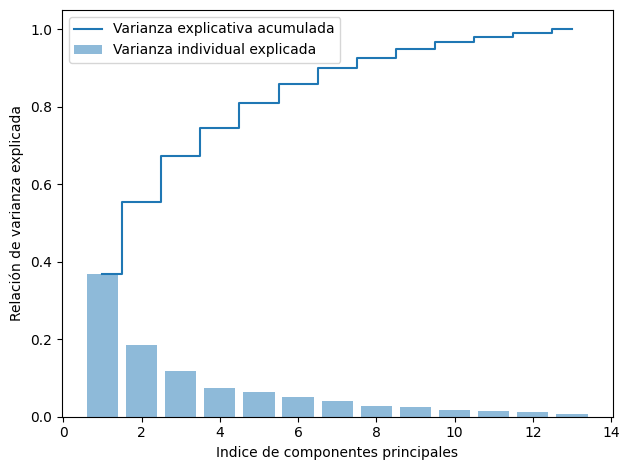

In [78]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Varianza individual explicada')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Varianza explicativa acumulada')
plt.ylabel('Relación de varianza explicada')
plt.xlabel('Indice de componentes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

5.   Seleccionar k autovectores que correspondan a los k autovalores mayores, donde k es la dimensionalidad del nuevo subespacio de características (k<=d)
6.   Construir una matriz de proyección **W** a partir de los **k **autovectores.
7.   Transformar el conjunto de datos de entrada **X** de **d** dimensiones para obtener el nuevo subespacio de características de **k** dimensiones.

**5.   Seleccionar k autovectores que correspondan a los k autovalores mayores, donde k es la dimensionalidad del nuevo subespacio de características (k<=d)**

In [86]:
# Hacer una lista de las tuplas (autovalor, autovector):

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

print(eigen_pairs)

# Ordenar las tuplas (autovalor, autovector) de mayor a menor
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

[(4.8427453156558915, array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582, -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066, -0.32613263, -0.36861022, -0.29669651])), (2.4160245870352246, array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,  0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581, -0.20716433, -0.24902536,  0.38022942])), (1.5484582488203518, array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,  0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,  0.05305915,  0.13239103, -0.07065022])), (0.9612043774977352, array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,  0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294, -0.36905375,  0.14201609, -0.16768217])), (0.8416616104578422, array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707, -0.11851114, -0.10710035, -0.50758161,  0.20163462,  0.00573607, -0.27691422, -0.06662756, -0.12802904])),

**6.   Construir una matriz de proyección **W** a partir de los **k **autovectores.**

In [88]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matriz W:\n', w)

Matriz W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


A continuación, se puede proceder a transformar una muestra (representada como un vector de fila de 1x13 dimensiones) en el subespacio PCA (en este caso los componentes principales uno y dos):

In [106]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733, -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864, -0.20017028, -0.82164144, -0.62946362])

In [89]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

De manera genérica, para todo el dataset de entrenamiento:


**7.   Transformar el conjunto de datos de entrada X de d dimensiones para obtener el nuevo subespacio de características de k dimensiones.**

In [91]:
X_train_pca = X_train_std.dot(w)
print(X_train_pca)

[[ 2.38299011  0.45458499]
 [-1.96578183  1.65376939]
 [-2.53907598  1.02909066]
 [-1.43010776  0.6024011 ]
 [ 3.14147227  0.66214979]
 [ 0.50253552 -2.08907131]
 [ 0.04867722 -2.27536044]
 [ 2.47888989 -0.08603318]
 [ 2.01900259 -1.3538719 ]
 [ 0.75156583 -2.55367947]
 [ 0.72268915 -1.18404391]
 [-3.00366211  0.94626934]
 [ 2.57518878 -1.0697549 ]
 [ 3.73151104  1.01968876]
 [-1.12276518  0.13877   ]
 [ 2.85996853  2.28819559]
 [-0.74717125 -3.21746061]
 [-1.58427878  0.16048055]
 [ 3.38887101  2.11550689]
 [ 3.15405473  0.54233966]
 [-1.28036506 -1.72926871]
 [-1.71438911  0.71745249]
 [-1.55040291 -1.7580591 ]
 [ 1.10984489 -1.20480693]
 [-0.69108418 -1.71385374]
 [-2.086036   -1.68453671]
 [ 2.90393456  1.95258805]
 [-2.07635784  1.47183304]
 [-1.74756185 -1.25842546]
 [ 2.59424456 -0.1056037 ]
 [-2.50372355  0.70412212]
 [-2.19448402  2.18657552]
 [ 3.91634534  0.16136475]
 [-1.11739618  0.51921086]
 [-0.89996804 -2.04759575]
 [-1.71469178  0.61392169]
 [-2.48581303  0.76839561]
 

Se procede a realizar un gráfico de dispersión del conjunto de datos de entrenamiento con los datos PCA ya transformados:

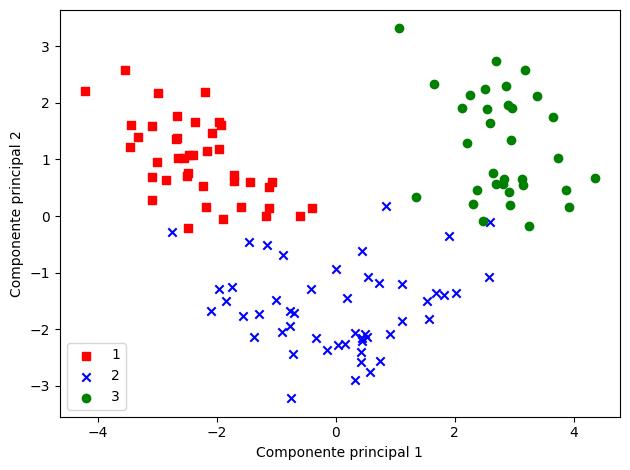

In [93]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# **2) PCA vía Sci-kit Learn**

Función para la graficación de la superfice de separación:

In [94]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

Validar la relación de varianza explicada de todos los componentes principales:

In [96]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108, 0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614, 0.01380021, 0.01172226, 0.00820609])

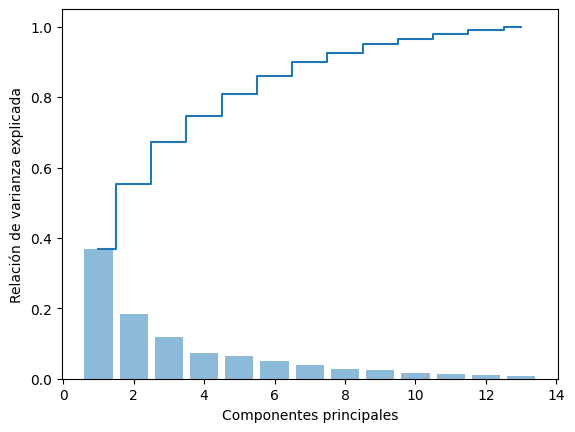

In [98]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Relación de varianza explicada')
plt.xlabel('Componentes principales')

plt.show()

In [100]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)

X_test_pca = pca.transform(X_test_std)

In [108]:
# Para obtener la matriz de proyección W
W = pca.components_
print(W)

[[-0.13724218  0.24724326 -0.02545159  0.20694508 -0.15436582 -0.39376952 -0.41735106  0.30572896 -0.30668347  0.07554066 -0.32613263 -0.36861022 -0.29669651]
 [ 0.50303478  0.16487119  0.24456476 -0.11352904  0.28974518  0.05080104 -0.02287338  0.09048885  0.00835233  0.54977581 -0.20716433 -0.24902536  0.38022942]]


In [109]:
print(W.T)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


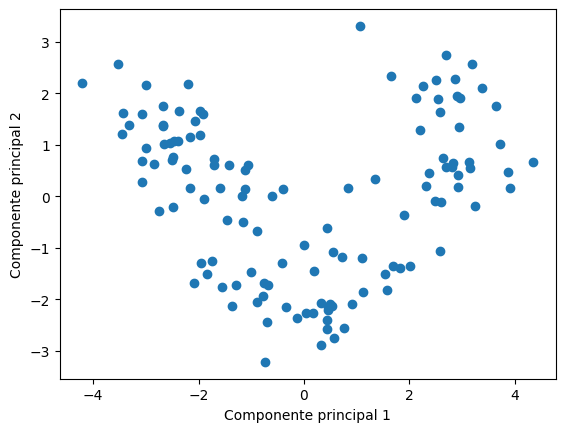

In [101]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr = lr.fit(X_train_pca, y_train)

Grafico para los datos de entrenamiento:

<ipython-input-94-277ea2ad0153>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-94-277ea2ad0153>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


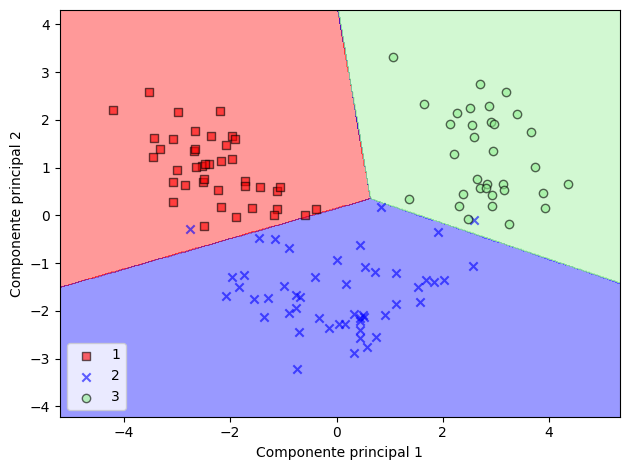

In [104]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Gráfico para los datos de testeo:

<ipython-input-94-277ea2ad0153>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-94-277ea2ad0153>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


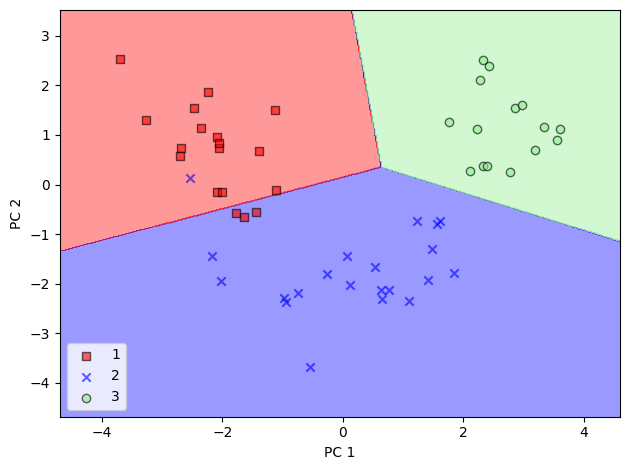

In [105]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [117]:
print(df_wine.iloc[0])

Class label                        1.00
Alcohol                           14.23
Malic acid                         1.71
Ash                                2.43
Alcalinity of ash                 15.60
Magnesium                        127.00
Total phenols                      2.80
Flavanoids                         3.06
Nonflavanoid phenols               0.28
Proanthocyanins                    2.29
Color intensity                    5.64
Hue                                1.04
OD280/OD315 of diluted wines       3.92
Proline                         1065.00
Name: 0, dtype: float64


Se procede a generar un dato muy parecido, que pertenezca a la clase 1:

In [128]:
dato_Nuevo = np.array([13.2, 1.6, 2.42, 15.3, 128, 2.7, 3.01, 0.25, 2.27, 5.55, 1.02, 3.90, 1061])
print(dato_Nuevo)
print(type(dato_Nuevo))

[1.320e+01 1.600e+00 2.420e+00 1.530e+01 1.280e+02 2.700e+00 3.010e+00 2.500e-01 2.270e+00 5.550e+00 1.020e+00 3.900e+00 1.061e+03]
<class 'numpy.ndarray'>


In [129]:
dato_Nuevo = dato_Nuevo.reshape(1, -1)
print(dato_Nuevo)
print(type(dato_Nuevo))

[[1.320e+01 1.600e+00 2.420e+00 1.530e+01 1.280e+02 2.700e+00 3.010e+00 2.500e-01 2.270e+00 5.550e+00 1.020e+00 3.900e+00 1.061e+03]]
<class 'numpy.ndarray'>


In [130]:
# Para realizar una predicción con un nuevo dato

nuevo_dato_std = sc.transform(dato_Nuevo)
print(nuevo_dato_std)


[[ 0.2021593  -0.64470194  0.1308603  -1.35303867  2.05689815  0.6101602   0.92784458 -0.97427813  1.06609052  0.19507718  0.29806378  1.84811135  0.94094873]]


In [132]:
nuevo_dato_pca = np.dot(nuevo_dato_std, W.T)
print(nuevo_dato_pca)

[[-3.08319087  0.65055691]]


Predecir el nuevo dato:

In [137]:
Res_prediccion_= lr.predict(nuevo_dato_pca)
print(Res_prediccion_)

[1]
